# Heart Attack Dataset from Kaggle

https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset/data

The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output. According to the provided information, the medical dataset classifies either heart attack or none. The gender column in the data is normalized: the male is set to 1 and the female to 0. The glucose column is set to 1 if it is > 120; otherwise, 0. As for the output, positive is set to 1 and negative to 0.

In [331]:
import pandas as pd
import numpy as np
import seaborn as srn
import statistics as sts
import matplotlib as mat
from sklearn.model_selection import train_test_split

In [332]:
data =  pd.read_csv("Medicaldataset.csv", sep=",")
print(f"Dataset size: {data.shape}")
data

Dataset size: (1319, 9)


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Exploratory data analysis


count    1319.000000
mean       56.193328
std        13.638173
min        14.000000
25%        47.000000
50%        58.000000
75%        65.000000
max       103.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age')

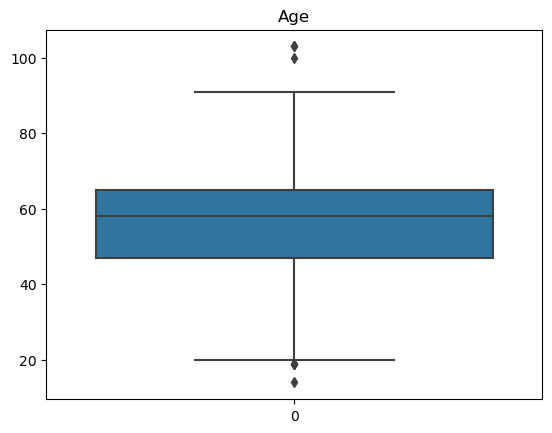

In [333]:
# Age
print(data['Age'].describe())
srn.boxplot(data['Age']).set_title('Age')  


In [334]:
# Gender - Normalized
gender = data.groupby(['Gender']).size()
gender # 0 = Female / 1 = Male

Gender
0    449
1    870
dtype: int64

count    1319.000000
mean       78.336619
std        51.630270
min        20.000000
25%        64.000000
50%        74.000000
75%        85.000000
max      1111.000000
Name: Heart rate, dtype: float64


Text(0.5, 1.0, 'Heart rate')

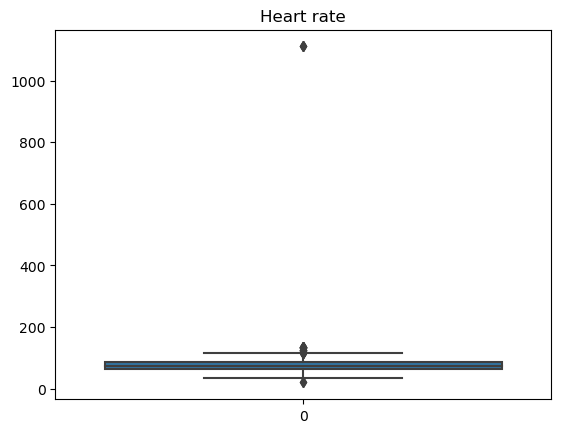

In [335]:
# Heart rate
print(data['Heart rate'].describe())
srn.boxplot(data['Heart rate']).set_title('Heart rate')  

count    1319.000000
mean      127.170584
std        26.122720
min        42.000000
25%       110.000000
50%       124.000000
75%       143.000000
max       223.000000
Name: Systolic blood pressure, dtype: float64


Text(0.5, 1.0, 'Systolic blood pressure')

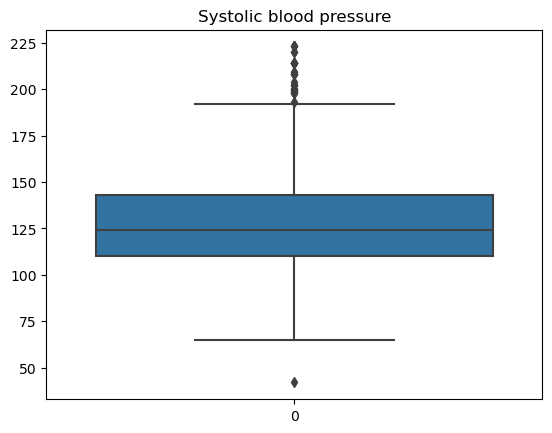

In [336]:
# Systolic blood pressure
print(data['Systolic blood pressure'].describe())
srn.boxplot(data['Systolic blood pressure']).set_title('Systolic blood pressure')  

count    1319.000000
mean       72.269143
std        14.033924
min        38.000000
25%        62.000000
50%        72.000000
75%        81.000000
max       154.000000
Name: Diastolic blood pressure, dtype: float64


Text(0.5, 1.0, 'Diastolic blood pressure')

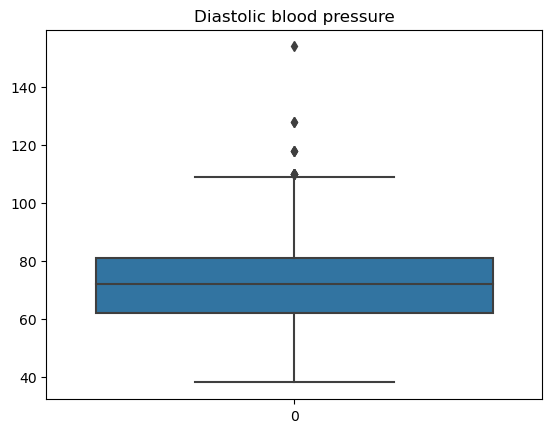

In [337]:
# Diastolic blood pressure
print(data['Diastolic blood pressure'].describe())
srn.boxplot(data['Diastolic blood pressure']).set_title('Diastolic blood pressure')  

count    1319.000000
mean      146.634344
std        74.923045
min        35.000000
25%        98.000000
50%       116.000000
75%       169.500000
max       541.000000
Name: Blood sugar, dtype: float64


Text(0.5, 1.0, 'Blood sugar')

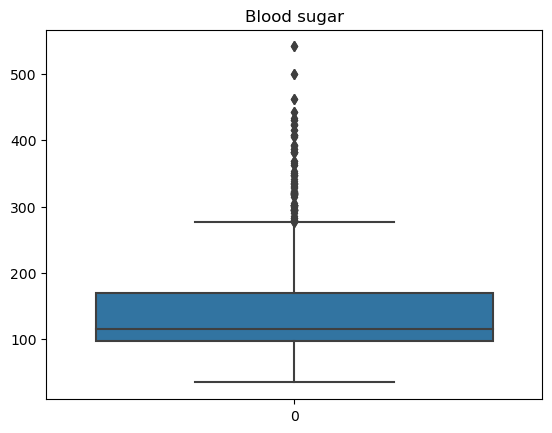

In [338]:
# Blood sugar
print(data['Blood sugar'].describe())
srn.boxplot(data['Blood sugar']).set_title('Blood sugar')  

count    1319.000000
mean       15.274306
std        46.327083
min         0.321000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: CK-MB, dtype: float64


Text(0.5, 1.0, 'CK-MB')

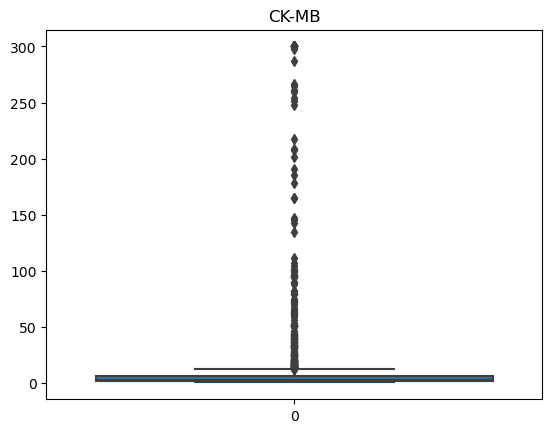

In [339]:
# CK-MB
print(data['CK-MB'].describe())
srn.boxplot(data['CK-MB']).set_title('CK-MB')  

count    1319.000000
mean        0.360942
std         1.154568
min         0.001000
25%         0.006000
50%         0.014000
75%         0.085500
max        10.300000
Name: Troponin, dtype: float64


Text(0.5, 1.0, 'Troponin')

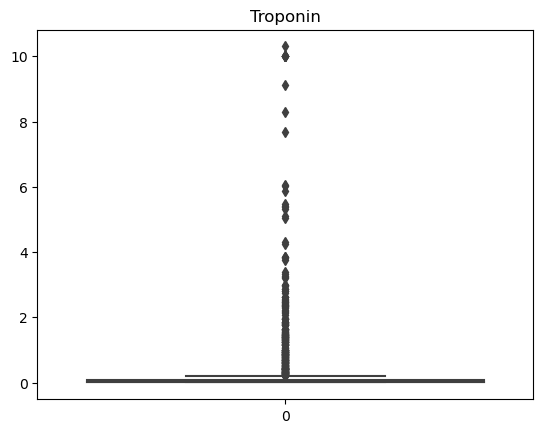

In [340]:
# Troponin
print(data['Troponin'].describe())
srn.boxplot(data['Troponin']).set_title('Troponin')  

In [341]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

- The text mentions a glucose column, but this column doesn't exists. That's why I will to add this columns  to the analyzed data set. 
- There is a unsual value in the heart rate, 1111. This value is an outlier, as it not possible to have such a rate, sice humans have a maximum of 200, 250. I will replace this value with the median value of heart rates.
- There are no null values in the data set, so there is no need to deal with null values.

# Data treatment

count    1319.000000
mean       73.669447
std        11.897191
min        20.000000
25%        64.000000
50%        74.000000
75%        82.000000
max       100.000000
Name: Heart rate, dtype: float64


Text(0.5, 1.0, 'Heart rate')

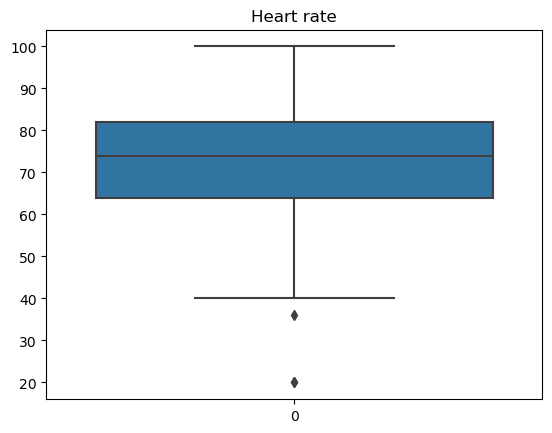

In [342]:
# Substituindo as umidades fora do domínio pela mediana
# Substituindo e verificando se ainda existem temperaturas fora do dominio
data.loc[(data['Heart rate'] > 100), 'Heart rate'] = sts.median(data['Heart rate'])
print(data['Heart rate'].describe())
srn.boxplot(data['Heart rate']).set_title('Heart rate')  

# Dividing the data set into test and training
- 70% train and 30% test
- The predictor is what we want to predict, it's the result (positive or negative), the last column of the data set
- The classes are the rest, everything that isn't the predictor. As there is only numerical data, we don't need to convert it.

In [343]:
predictor = data.iloc[:,0:8].values
classes = data.iloc[:,8].values

X_train, X_test, y_train, y_test = train_test_split(predictor, classes, test_size = 0.3, random_state = 0)

# Creating a function to insert the results of each algorithm into the results file

In [344]:
import csv
import os

def add_result(algorithm_name, success_rate):
    if not os.path.exists('results.csv'):
        with open('results.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Algorithm', 'Success Rate'])

    with open('results.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        success_rate = round(success_rate, 5)
        writer.writerow([algorithm_name, success_rate])

# Prediction algorithms
- In this section, we will test some algorithms for predicting the patient's outcome and check their accuracy.

In [345]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Decision Tree

In [346]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
predictions_DT = tree.predict(X_test)
predictions_DT

array(['negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negati

In [347]:
confusion = confusion_matrix(y_test, predictions_DT)
confusion

array([[150,   1],
       [  1, 244]], dtype=int64)

In [348]:
sucess_rate = accuracy_score(y_test, predictions_DT)
error_rate = 1 - sucess_rate
print(sucess_rate)
add_result("Decision Tree", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

0.9949494949494949
Sucess rate: 0.9949494949494949 - Error rate: 0.005050505050505083


## Naive Bayes
- Using Gaussian method

In [349]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
predictions_NB = naive_bayes.predict(X_test)
predictions_NB

array(['negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negati

In [350]:
confusion = confusion_matrix(y_test, predictions_NB)
confusion

array([[151,   0],
       [128, 117]], dtype=int64)

In [351]:
sucess_rate = accuracy_score(y_test, predictions_NB)
error_rate = 1 - sucess_rate
add_result("Naive Bayes", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

Sucess rate: 0.6767676767676768 - Error rate: 0.3232323232323232


## Support Vector Machines (SVM)

In [352]:
svm = SVC()
svm.fit(X_train, y_train)
predictions_SVM = svm.predict(X_test)
predictions_SVM

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negati

In [353]:
confusion = confusion_matrix(y_test, predictions_SVM)
confusion

array([[ 31, 120],
       [  7, 238]], dtype=int64)

In [354]:
sucess_rate = accuracy_score(y_test, predictions_SVM)
error_rate = 1 - sucess_rate
add_result("SVM", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

Sucess rate: 0.6792929292929293 - Error rate: 0.3207070707070707


## K-Nearest Neighbors

In [355]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions_KNN = knn.predict(X_test)
predictions_KNN

array(['negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positi

In [356]:
confusion = confusion_matrix(y_test, predictions_KNN)
confusion

array([[ 75,  76],
       [ 71, 174]], dtype=int64)

In [357]:
sucess_rate = accuracy_score(y_test, predictions_KNN)
error_rate = 1 - sucess_rate
add_result("KNN", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

Sucess rate: 0.6287878787878788 - Error rate: 0.3712121212121212


## Random Forest

In [358]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
predictions_RF = forest.predict(X_test)
predictions_RF

array(['negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negati

In [359]:
confusion = confusion_matrix(y_test, predictions_RF)
confusion

array([[150,   1],
       [  2, 243]], dtype=int64)

In [360]:
sucess_rate = accuracy_score(y_test, predictions_RF)
error_rate = 1 - sucess_rate
add_result("Random Forest", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

Sucess rate: 0.9924242424242424 - Error rate: 0.007575757575757569


## Artificial Neural Networks

In [361]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)
predictions_ANN = mlp.predict(X_test)
predictions_ANN

array(['positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negati

In [362]:
confusion = confusion_matrix(y_test, predictions_ANN)
confusion

array([[ 75,  76],
       [ 21, 224]], dtype=int64)

In [363]:
sucess_rate = accuracy_score(y_test, predictions_ANN)
error_rate = 1 - sucess_rate
add_result("Artificial Neural Network", sucess_rate)
print(f"Sucess rate: {sucess_rate} - Error rate: {error_rate}")

Sucess rate: 0.7550505050505051 - Error rate: 0.24494949494949492


# Conclusion
- We can see that the model that performed best was the Decision Tree Mode, as it has the best sucess rate.
- I will run it again just to collect the y_test set from the best model.

In [364]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
predictions_DT = tree.predict(X_test)
y_predict = predictions_DT
data_predict = np.column_stack((X_test, y_predict))
data_predict


array([[53.0, 1.0, 89.0, ..., 6.04, 0.003, 'negative'],
       [75.0, 0.0, 80.0, ..., 4.71, 0.062, 'positive'],
       [31.0, 1.0, 74.0, ..., 8.69, 0.003, 'positive'],
       ...,
       [57.0, 1.0, 95.0, ..., 4.34, 10.3, 'positive'],
       [40.0, 1.0, 57.0, ..., 2.11, 0.003, 'negative'],
       [73.0, 1.0, 91.0, ..., 0.907, 0.037, 'positive']], dtype=object)